In [42]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score

In [26]:
# load data
df = pd.read_csv('data.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [27]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [28]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

## First attempt: keep all features

In [31]:
X = df.iloc[:,1:31]
y = df.iloc[:,0]

In [38]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [39]:
# import the class
from sklearn.linear_model import LogisticRegression

In [40]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/fengyitong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
y_pred_accuracy = logreg.score(X_test,y_test)
y_pred_accuracy

0.9298245614035088

In [106]:
r2_score(y2_test, y2_pred)

0.7333778817240226

## Second attempt: KBest function to select top 10 features

In [51]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [52]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,radius_mean,266.104917
1,texture_mean,93.897508
2,perimeter_mean,2011.102864
3,area_mean,53991.655924
4,smoothness_mean,0.149899
5,compactness_mean,5.403075
6,concavity_mean,19.712354
7,concave points_mean,10.544035
8,symmetry_mean,0.257380
9,fractal_dimension_mean,0.000074


In [53]:
print(featureScores.nlargest(10,'Score'))  

              Specs          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


In [89]:
X1 = df[['area_worst', 'area_mean', 'area_se',
       'perimeter_worst', 'perimeter_mean', 'radius_worst',
       'radius_mean', 'perimeter_se', 'texture_worst', 'texture_mean']]
y1 = y

In [90]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=16)
# fit the model with data
logreg.fit(X1_train, y1_train)
y1_pred = logreg.predict(X1_test)

/Users/fengyitong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
y_pred_accuracy = logreg.score(X1_test,y1_test)
y_pred_accuracy

0.9122807017543859

In [92]:
r2_score(y1_test, y1_pred)

0.6191112596057466

In [61]:
print(featureScores.nlargest(20,'Score'))  

                   Specs          Score
23            area_worst  112598.431564
3              area_mean   53991.655924
13               area_se    8758.504705
22       perimeter_worst    3665.035416
2         perimeter_mean    2011.102864
20          radius_worst     491.689157
0            radius_mean     266.104917
12          perimeter_se     250.571896
21         texture_worst     174.449400
1           texture_mean      93.897508
26       concavity_worst      39.516915
10             radius_se      34.675247
6         concavity_mean      19.712354
25     compactness_worst      19.314922
27  concave points_worst      13.485419
7    concave points_mean      10.544035
5       compactness_mean       5.403075
28        symmetry_worst       1.298861
16          concavity_se       1.044718
15        compactness_se       0.613785


## Third attempt: select variables with high correlation

In [62]:
X2 = df[['area_worst', 'area_mean', 'area_se',
       'perimeter_worst', 'perimeter_mean', 'radius_worst',
       'radius_mean', 'perimeter_se', 'texture_worst', 'texture_mean','concavity_worst','radius_se','concavity_mean',
        'compactness_worst','concave points_worst','concave points_mean','compactness_mean','symmetry_worst',
         'concavity_se','compactness_se']]
y2 = y

In [94]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=16)
# fit the model with data
logreg.fit(X2_train, y2_train)
y2_pred = logreg.predict(X2_test)

/Users/fengyitong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
y_pred_accuracy = logreg.score(X2_test,y2_test)
y_pred_accuracy

0.9122807017543859

In [95]:
r2_score(y2_test, y2_pred)

0.7333778817240226

<AxesSubplot:>

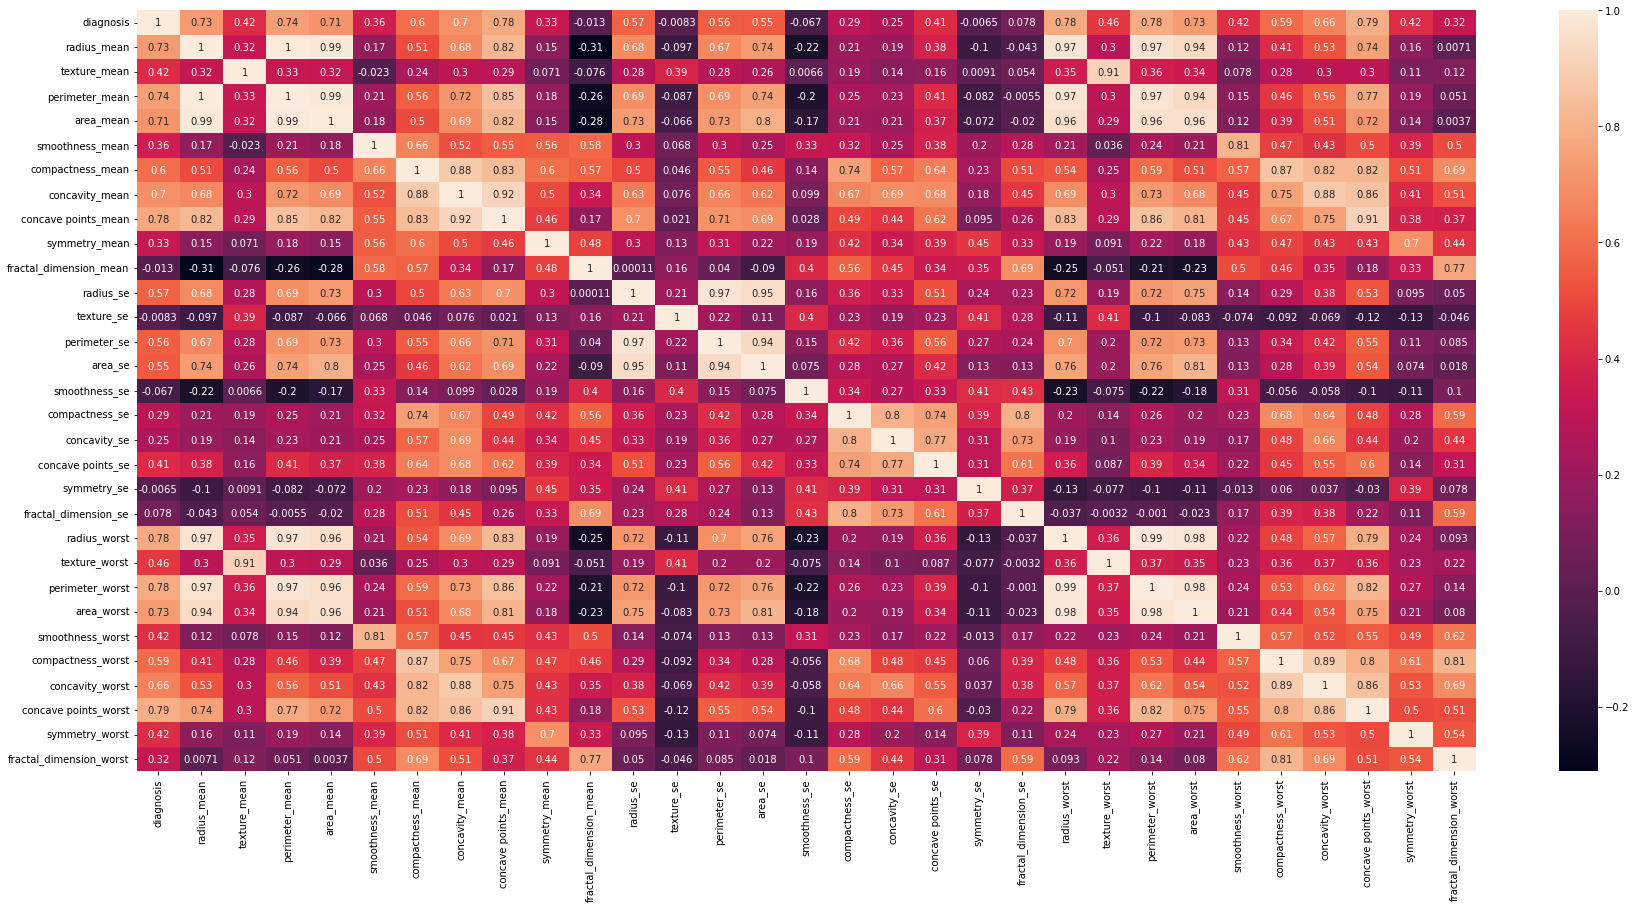

In [74]:
# pearson correlation coefficient
plt.figure(figsize=(30,14))
sns.heatmap(df.corr(),annot=True)

In [81]:
X3 = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 
       'radius_se', 'perimeter_se', 'area_se', 
       'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y3 = y

In [97]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=16)
# fit the model with data
logreg.fit(X3_train, y3_train)
y3_pred = logreg.predict(X3_test)

/Users/fengyitong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
y_pred_accuracy = logreg.score(X3_test,y3_test)
y_pred_accuracy

0.9385964912280702

In [98]:
r2_score(y3_test, y3_pred)

0.7333778817240226

## Fourth attempt: drop similiar variables with high coefficient numbers

In [82]:
X4 = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 
       'radius_se', 'perimeter_se', 'area_se', 
       'compactness_se', 'concavity_se', 'concave points_se']]
y4 = y

In [99]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=16)
# fit the model with data
logreg.fit(X4_train, y4_train)
y4_pred = logreg.predict(X4_test)

/Users/fengyitong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
y_pred_accuracy = logreg.score(X4_test,y4_test)
y_pred_accuracy

0.9473684210526315

In [100]:
r2_score(y4_test, y4_pred)

0.771466755763448

## Error analysis

In [102]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y4_test, y4_pred)
cnf_matrix

array([[72,  1],
       [ 5, 36]])

Text(0.5, 257.44, 'Predicted label')

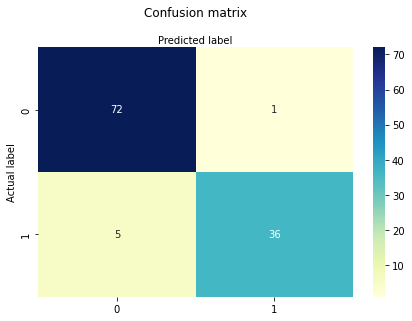

In [103]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [104]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y4_test, y4_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.94      0.99      0.96        73
   with diabetes       0.97      0.88      0.92        41

        accuracy                           0.95       114
       macro avg       0.95      0.93      0.94       114
    weighted avg       0.95      0.95      0.95       114



## ROC curve

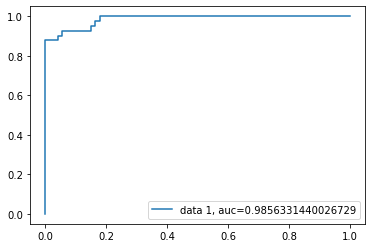

In [105]:
y4_pred_proba = logreg.predict_proba(X4_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y4_test,  y4_pred_proba)
auc = metrics.roc_auc_score(y4_test, y4_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()